## 模型评价

对于回归预测结果，通常会有平均绝对误差（MAE)，均方误差（MSE），平均绝对百分比误差（MAPE）等 3 个指标进行评价。


## 模型检验

当我们使用回归分析拟合数据时，实际上是通过样本所估计的参数来代替了总体的真实参数。尽管从统计性质上可知，当进行足够多的重复抽样操作后，参数估计值的期望就等于其总体的真实参数。但实际上，单次抽样过程中，参数的估计值和真实值可能存在差异。

那么，单次抽样后，参数的估计值与真实值差异是否显著，就需要进行统计检验。

实际上，在一元线性回归模型中，一般需要：拟合优度检验、变量的显著性检验及参数的区间估计。

在多元线性回归模型中，往往会有：拟合优度检验、变量的显著性检验（T 检验）、方程的显著性检验（F 检验）及参数的置信区间。其中，一元线性回归中的 T 检验和 F 检验一致。

一元线性回归的拟合优度检验，指的是对样本回归拟合直线与样本观测值之间拟合程度进行检验。我们一般会使用判定系数 R2作为度量拟合优度的指标。

一般情况下，R2 的有效取值范围在 [0,1]之间。值越大，就代表模型的拟合优度越好。

定义：
    rss = np.sum(pow((y1 - model1.predict(x)), 2))  （残差）
    tss = np.sum(pow((y1 - np.mean(y1)), 2))        （离差）
    R2 = ess/tss = (tss - rss)/tss = 1 - rss/tss

简而言之，当 RSS 越小时，R2就越趋近于 1，那么代表模型的解释力越强。反之，模型的解释力就越弱。

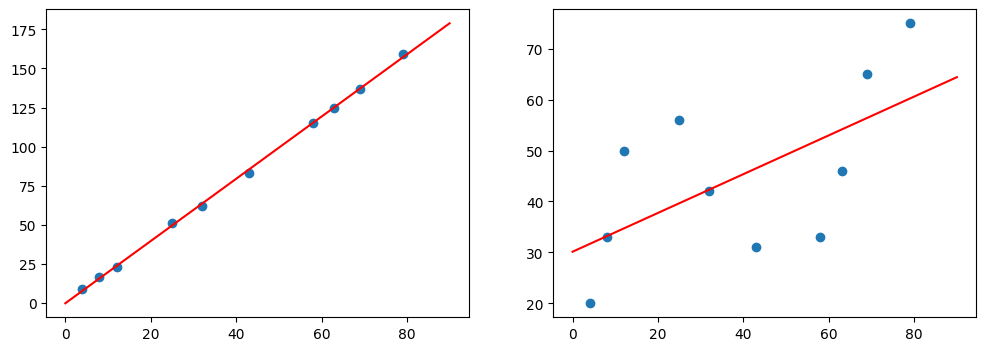

In [1]:
import numpy as np

# 生成 2 组 x 相同的示例数据
x = np.array([4, 8, 12, 25, 32, 43, 58, 63, 69, 79]).reshape(-1, 1)
y1 = np.array([9, 17, 23, 51, 62, 83, 115, 125, 137, 159]).reshape(-1, 1)
y2 = np.array([20, 33, 50, 56, 42, 31, 33, 46, 65, 75]).reshape(-1, 1)


from matplotlib import pyplot as plt
%matplotlib inline

## 两组数据分别绘制子图
#fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#axes[0].scatter(x, y1)
#axes[1].scatter(x, y2)


from sklearn.linear_model import LinearRegression
model1 = LinearRegression()  # 线性模型 1
model1.fit(x, y1)

model2 = LinearRegression()  # 线性模型 2
model2.fit(x, y2)


# 绘制拟合直线到原散点图中
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 模型 1
axes[0].scatter(x, y1)
axes[0].plot(
    [0, 90], [model1.intercept_, model1.coef_[0] * 90 + model1.intercept_], "r"
)
# 模型 2
axes[1].scatter(x, y2)
axes[1].plot(
    [0, 90], [model2.intercept_, model2.coef_[0] * 90 + model2.intercept_], "r"
)

In [2]:
from sklearn.metrics import r2_score
# 分别传入真实观测值和模型预测值
r2_score(y1, model1.predict(x)), r2_score(y2, model2.predict(x))


# 使用公式计算方法验证 model1 计算结果
rss = np.sum(pow((y1 - model1.predict(x)), 2))
tss = np.sum(pow((y1 - np.mean(y1)), 2))
1 - rss / tss

0.9993315719475073

可以看到，模型 1 的 R2 结果趋近于 1，而模型 2 的 R2的值则小很多。这代表线性回归模型对第一组数据的解释力较强，而对第二组数据解释力不足。实际上，通过肉眼也可以发现，第二组数据其实更适合于多项式回归模型，而非线性回归模型。

所以说，虽然采用普通最小二乘估计方法已经能保证模型拟合结果最优，但是依然需要通过「拟合优度检验」来判断该模型是不是能很好地解释数据分布。

## 变量显著性检验
变量显著性检验是回归分析中判断解释变量x 是否是被解释变量y 的一个显著性的影响因素，其将应用到数理统计学中的假设检验知识。假设检验的原理就是，通过事先对总体参数或总体分布形式作出假设。然后，利用样本信息来判断原假设是否合理。也就是说，通过判断样本信息与原假设是否有显著差异，从而决定是否接受或否定原假设。


In [3]:
import statsmodels.api as sm

x = sm.add_constant(x)  # 添加截距项系数 1
model = sm.OLS(endog=y2, exog=x)  # 普通最小二乘法, endog 因变量, exog 自变量
results = model.fit()
results.params  # 输出拟合后系数



array([30.12973186,  0.38092285])

In [4]:
import warnings

warnings.filterwarnings("ignore")

results.summary2(alpha=0.05)  # 输出模型摘要, 95% 置信度

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.296  
Dependent Variable: y                AIC:                83.1646
Date:               2024-05-13 16:58 BIC:                83.7698
No. Observations:   10               Log-Likelihood:     -39.582
Df Model:           1                F-statistic:        4.781  
Df Residuals:       8                Prob (F-statistic): 0.0602 
R-squared:          0.374            Scale:              200.68 
------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
const     30.1297     8.1820   3.6824   0.0062   11.2620   48.9975
x1         0.3809     0.1742   2.1865   0.0602   -0.0208    0.7827
----------------------------------------------------------------
Omnibus:              2.455        Durbin-Watson:          0.832
Prob(Omnibus):        0.293        Jarque-Bera (JB):       0.895
Skew:                 -0.056       Prob(JB):               0.639
Kurtosis:             1.538        Condition No.:          86   
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

重点查看第二个表格，依次得到了拟合系数(Coef.），标准误差（Std.Err.），t 值，p 值，以及置信区间。

其中，我们要查看的就是 P 值，如果 P 值很小，那么说明该变量通过显著性检验，需要保留在模型中。实际上，当我们做多元回归建模时，就可以通过查看 P 值，把不显著的变量剔除。

实际上，上面的表格中同时给出了参数检验的置信区间估计。最后两列表示，截距项和自变量系数在 97.5% 的置信度下的置信区间

由于置信区间反映了样本参数估计值与总体参数真值的接近程度，因此置信区间越小越好。通常，我们可以通过增大样本容量以及提供模型拟合优度来缩小置信区间。